In [1]:
# python scripts
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import cycler
from path import Path
from numpy import save,load

# own scripts
import model_2D
import plotting_funcs_thesis as plt_funcs

In [2]:
# here all parameters are in mV,s and Hz
w = 2.4
beta = 0.4

I = 0
theta = 10

g = 0.25
model_2D.tau_a = 1

params_sigmoid = [g,theta]
params_weights = [beta,w,I]

In [3]:
model_2D.N

600

In [4]:
colors = cycler('color',
                ['#E24A33','black','#348ABD','#988ED5','#777777','#FBC15E','#8EBA42','#FFB5B8'])

In [5]:

# sizes of moving average plots shown next to another figure
params = {'figure.figsize': (28,7),
        'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 10,
         'axes.labelsize': 50,#35 when single plot
         'axes.titlesize':35,
         'xtick.labelsize':50,#35 when single plot
         'ytick.labelsize':50,#35 when single plot
         'xtick.major.size': 16,
          'xtick.major.width' : 2,
          'xtick.minor.size' :10,
          'xtick.minor.width' : 2,
         'ytick.major.size': 16,
          'ytick.major.width' : 2,
          'ytick.minor.size' :10,
          'ytick.minor.width' : 2,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

# Running deterministic oscillatory regime

In [6]:
# here all parameters are in mV,s and Hz
w = 1.9
beta = 0.4

I = 2.5
theta = 10

g = 0.25
model_2D.tau_a = 1

params_sigmoid = [g,theta]
params_weights = [beta,w,I]

In [7]:
# initial condition
Sys0 = np.array([0,0])
time = np.arange(0, 20, model_2D.dt)
params = beta,w,I,g,theta 
X, infodict = odeint(model_2D.Sys,Sys0,time,args = (params,),full_output=True)
h,a = X.T
r = model_2D.sigmoidal_transfer(h,g,theta)

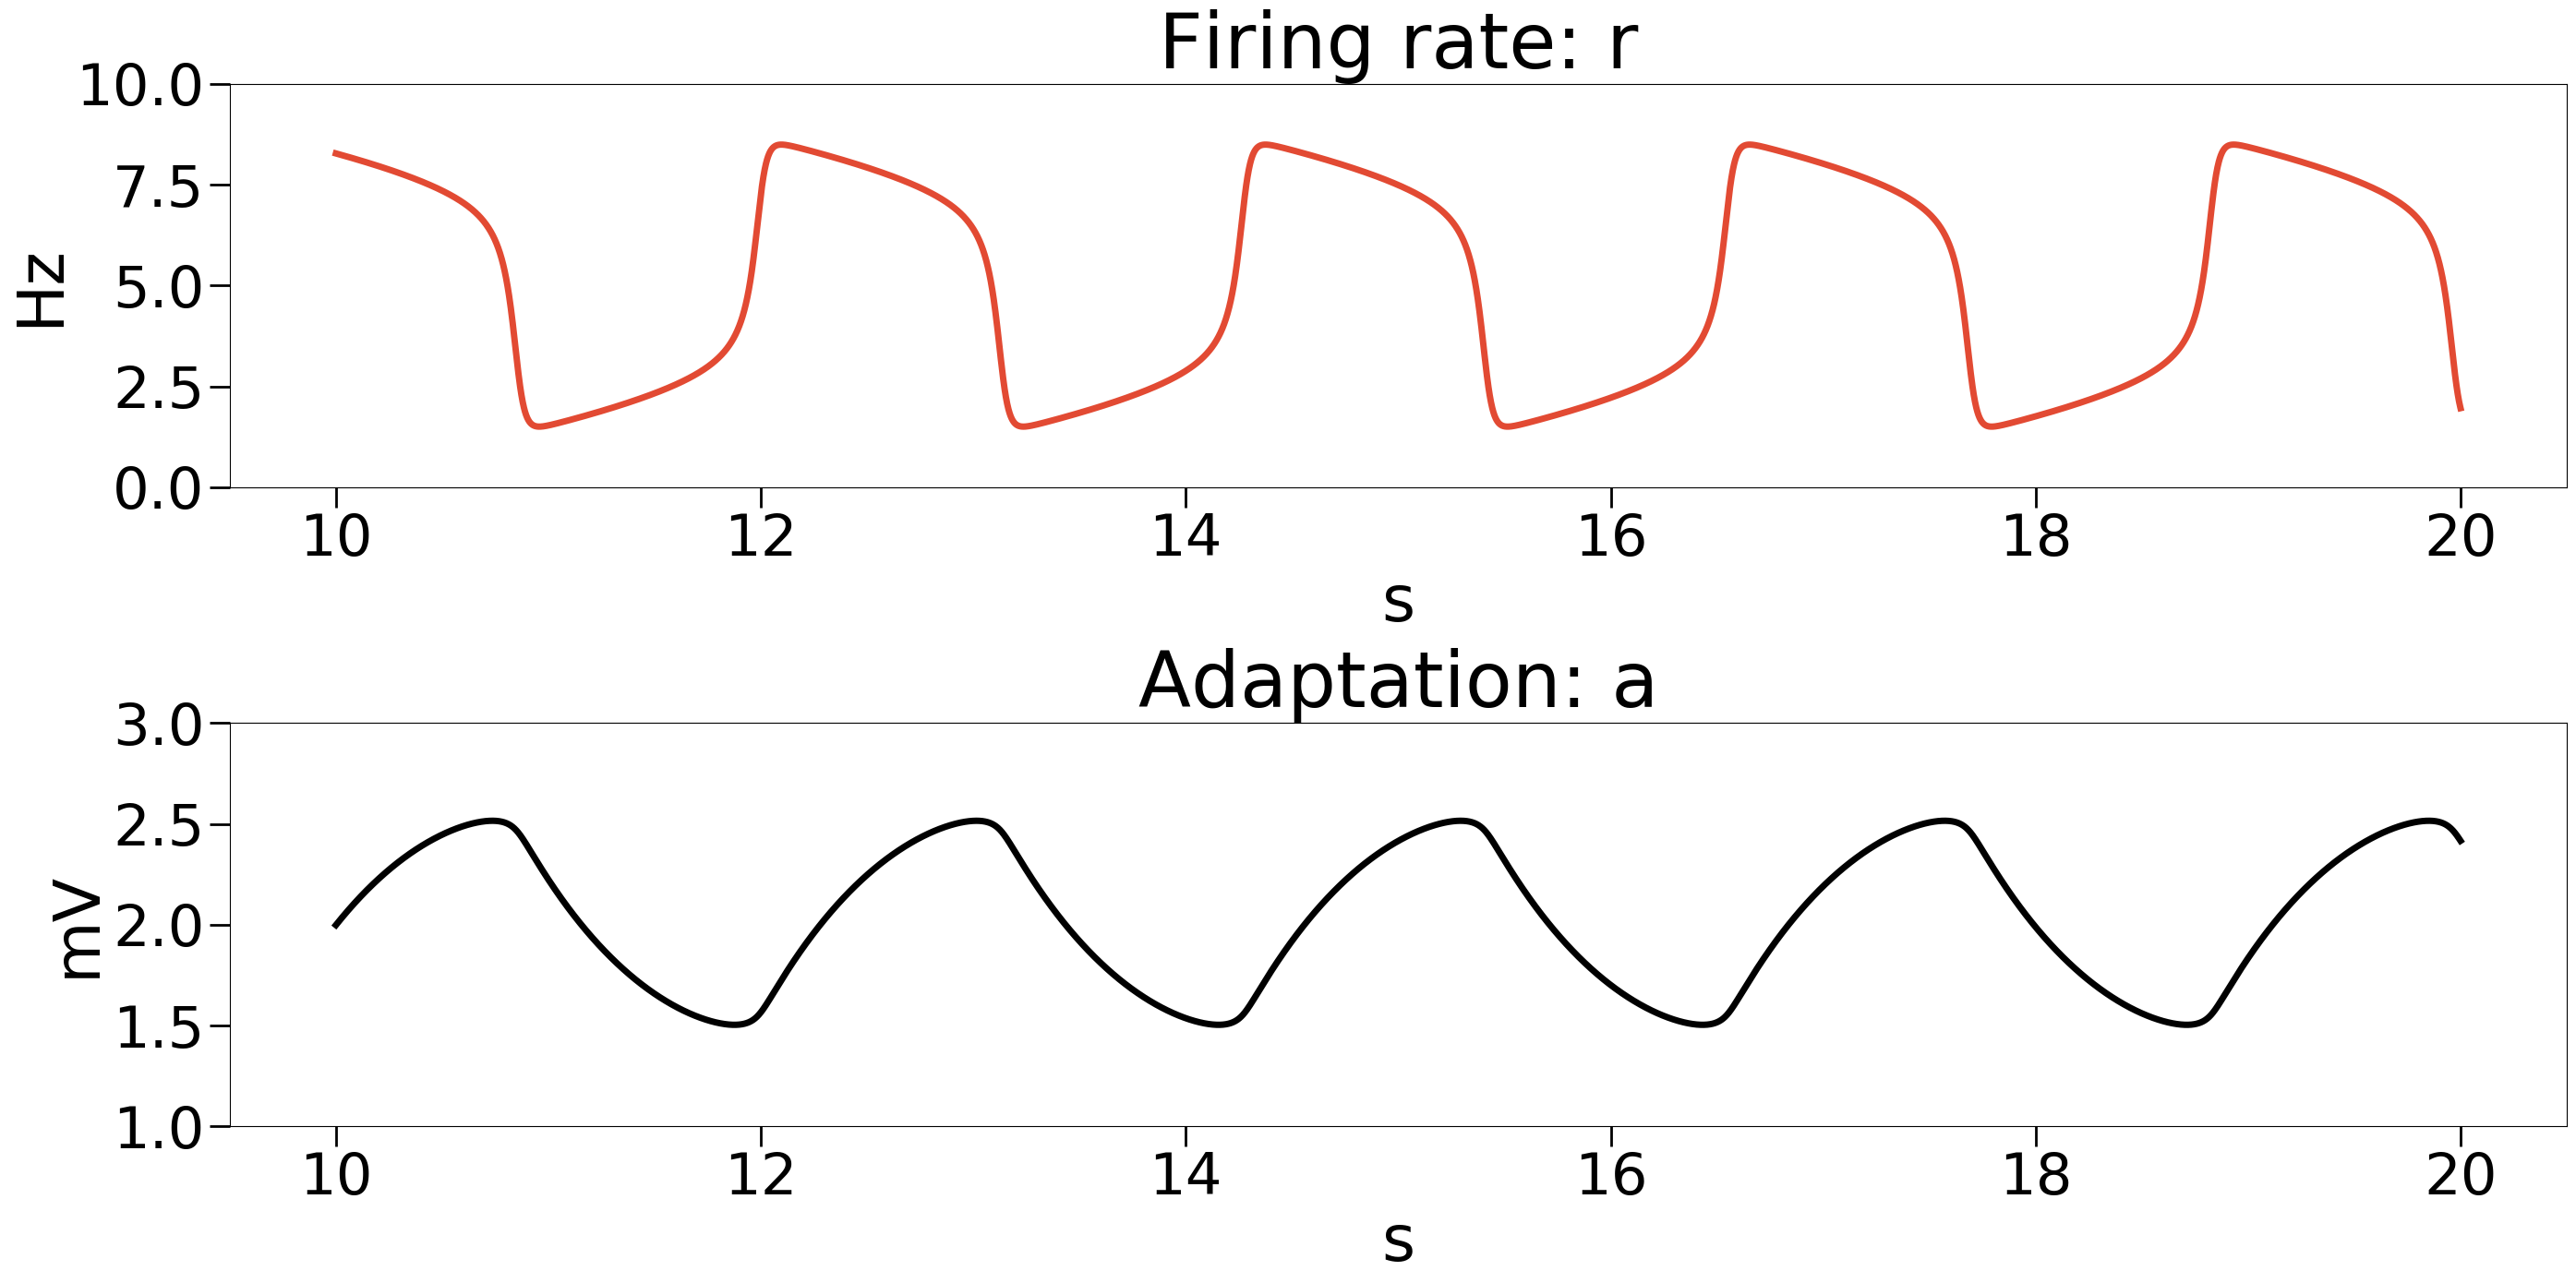

In [8]:
plt_funcs.plot_dynamics_2D(time,r,a,start_time = 10,end_time = 20,saveplot = False)

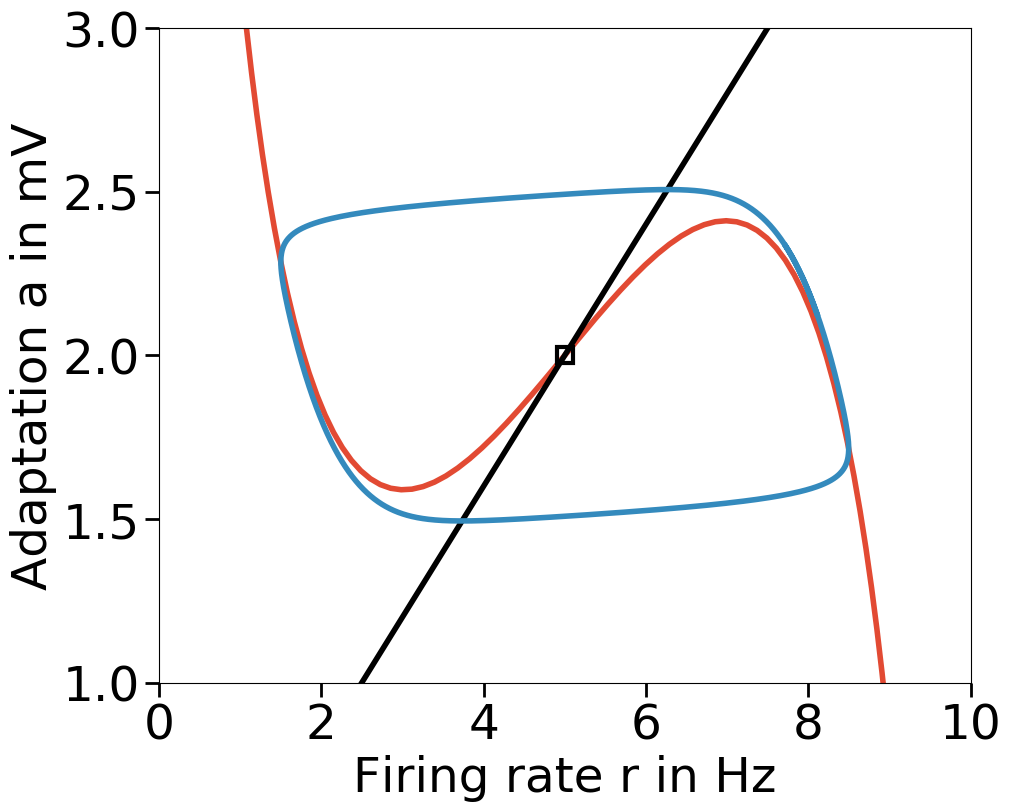

In [9]:
params = {'figure.figsize': (10,8),
          'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 25,
         'axes.labelsize': 35,#25
         'axes.titlesize':35,#25
         'xtick.labelsize':35,#30
         'ytick.labelsize':35,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

params_sigmoid = [g,theta]
params_weights = [beta,w,I]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


plt.plot(F,h_nullcline,label = "r Nullcline")
plt.plot(F,a_nullcline,label = "a Nullcline")
plt.plot(r[1000:3500],a[1000:3500],label= "Trajectory")
plt.plot(5,beta*5,marker = "s",color = "black",fillstyle='none',mew = 3,ms = 12)
plt.xlabel("Firing rate r in Hz")
plt.ylabel("Adaptation a in mV")
plt.xlim(0,10)
plt.ylim(1,3)
#plt.legend(loc = "lower center",bbox_to_anchor=(0.5, -0.7))
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()

# Showing transfer function and different nullcline settings

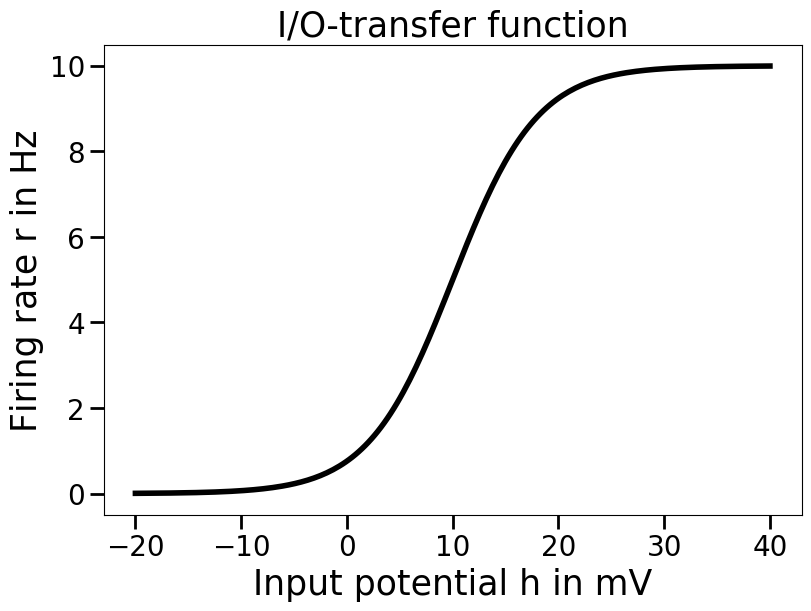

In [10]:
params = {'figure.figsize': (8,6),
          'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

h = np.linspace(-20,40,200)
plt.plot(h, model_2D.sigmoidal_transfer(h,g,theta),color = "black")
plt.title("I/O-transfer function")
plt.xlabel("Input potential h in mV")
plt.ylabel("Firing rate r in Hz")
#plt.savefig(path_save,dpi=200)
plt.show()

In [11]:
marker_style = dict(color='black', marker='o',edgecolor = "black",
                    markersize=12, markerfacecoloralt='white',mew = 3)

In [12]:
# here all parameters are in mV,s and Hz
w = 2.4
beta = 0.4

I = 0
theta = 10

g = 0.25
model_2D.tau_a = 1

params_sigmoid = [g,theta]
params_weights = [beta,w,I]

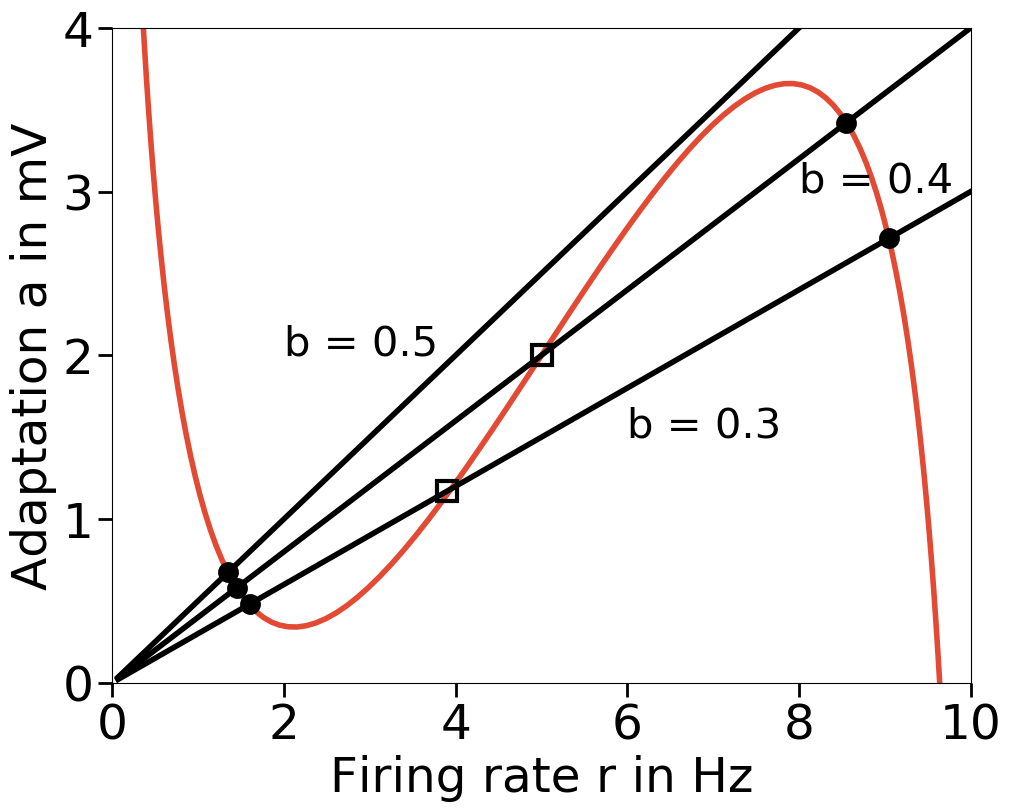

In [13]:
# changing the parameters and showing the effect this has
params = {'figure.figsize': (10,8),
          'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 25,
         'axes.labelsize': 35,
         'axes.titlesize':35,
         'xtick.labelsize':35,
         'ytick.labelsize':35,
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

params_sigmoid = [g,theta]
params_weights_1 = [0.3,w,I]
params_weights_2 = [0.4,w,I]
params_weights_3 = [0.5,w,I]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights_1)
a_nullcline_1 = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights_1)
a_nullcline_2 = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights_2)
a_nullcline_3 = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights_3)
F = model_2D.sigmoidal_transfer(h,g,theta)


plt.plot(F,h_nullcline)
plt.plot(F,a_nullcline_1)
plt.plot(F,a_nullcline_2,color = 'black')
plt.plot(F,a_nullcline_3,color = 'black')
#plt.plot(r[1000:5000],a[1000:5000],label= "Trajectory")
plt.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 3,ms = 14)
plt.plot(8.55,0.4*8.55,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(9.05,0.3*9.05,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)

plt.plot(1.6,0.3*1.6,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(1.45,0.4*1.45,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(1.35,0.5*1.35,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(3.9,0.3*3.9,marker = "s",color = "black",fillstyle='none',mew = 3,ms = 14)

plt.text(2, 2, r'b = 0.5', fontsize=30)
plt.text(8,3, r'b = 0.4', fontsize=30)
plt.text(6, 1.5, r'b = 0.3', fontsize=30)


plt.xlabel("Firing rate r in Hz")
plt.ylabel("Adaptation a in mV")
plt.xlim(0,10)
plt.ylim(0,4)
#plt.legend(loc = "upper left")
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()

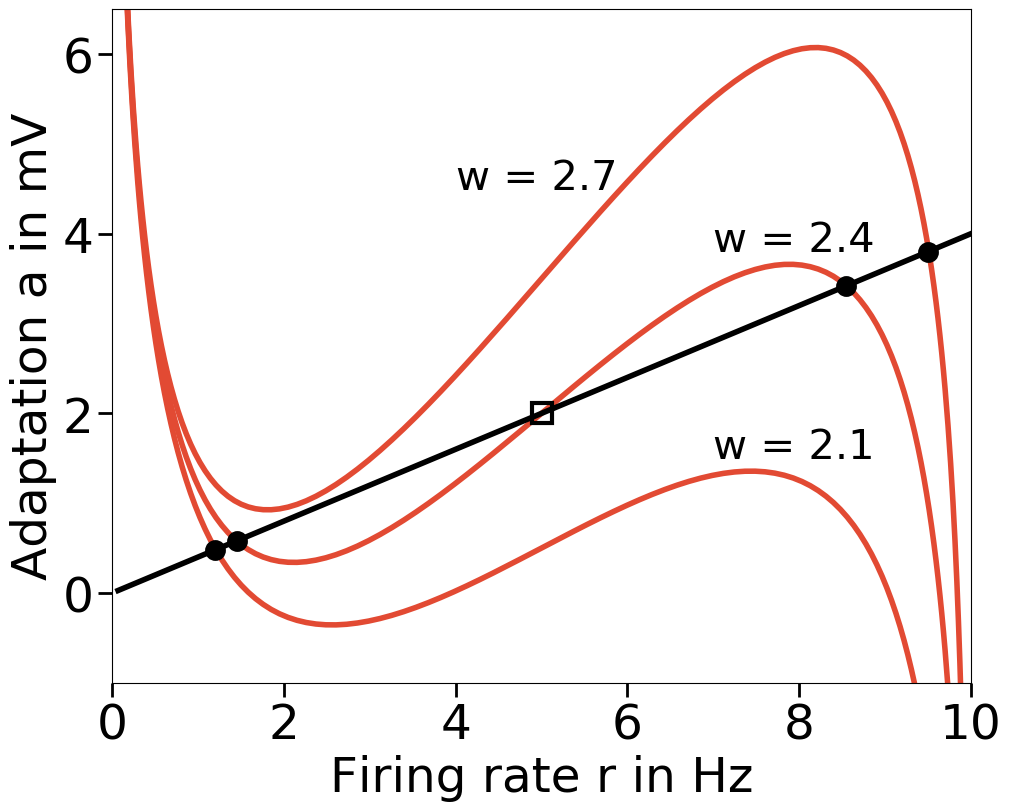

In [19]:
# changing the parameters and showing the effect this has
params = {'figure.figsize': (10,8),
          'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 25,
         'axes.labelsize': 35,
         'axes.titlesize':35,
         'xtick.labelsize':35,
         'ytick.labelsize':35,
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)
plt.rcParams.update(params)

params_sigmoid = [g,theta]
params_weights_1 = [beta,2.1,I]
params_weights_2 = [beta,2.4,I]
params_weights_3 = [beta,2.7,I]
h = np.linspace(-10,40,200)

h_nullcline_1 = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights_1)
h_nullcline_2 = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights_2)
h_nullcline_3 = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights_3)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights_1)

F = model_2D.sigmoidal_transfer(h,g,theta)


plt.plot(F,h_nullcline_1,label = "w = 1.9")
plt.plot(F,h_nullcline_2,color = '#E24A33',label = "w = 1.8")
plt.plot(F,h_nullcline_3,color = '#E24A33',label = "w = 2")
plt.text(4, 4.5, r'w = 2.7', fontsize=30)
plt.text(7, 3.8, r'w = 2.4', fontsize=30)
plt.text(7, 1.5, r'w = 2.1', fontsize=30)
plt.xlabel("Firing rate r in Hz")
plt.plot(F,a_nullcline,color = "black")
#plt.plot(r[1000:5000],a[1000:5000],label= "Trajectory")
plt.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 3,ms = 14)
plt.plot(1.45,0.4*1.45,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(8.55,0.4*8.55,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)

plt.plot(1.2,0.4*1.2,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(9.5,0.4*9.5,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)

plt.xlabel("Firing rate r in Hz")
plt.ylabel("Adaptation a in mV")
plt.xlim(0,10)
plt.ylim(-1,6.5)
#plt.legend(loc = "upper left")
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()

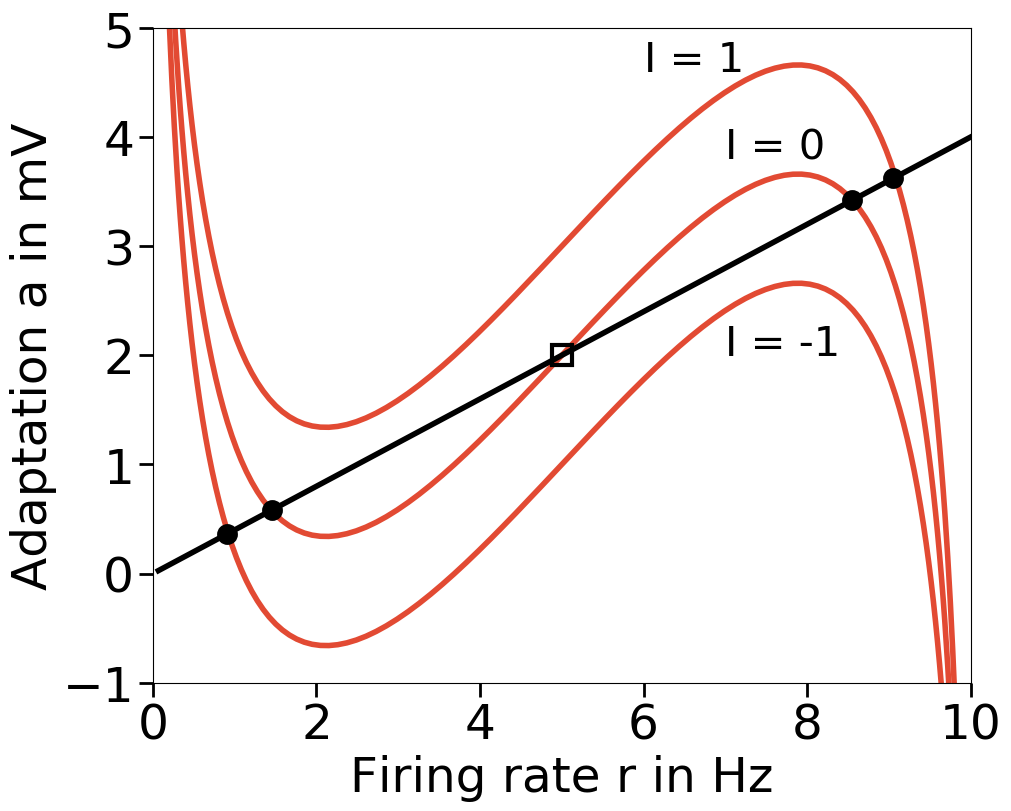

In [20]:
# changing the parameters and showing the effect this has
params = {'figure.figsize': (10,8),
          'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 25,
         'axes.labelsize': 35,
         'axes.titlesize':35,
         'xtick.labelsize':35,
         'ytick.labelsize':35,
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

params_sigmoid = [g,theta]
params_weights_1 = [beta,w,-1]
params_weights_2 = [beta,w,0]
params_weights_3 = [beta,w,1]
h = np.linspace(-10,40,200)

h_nullcline_1 = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights_1)
h_nullcline_2 = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights_2)
h_nullcline_3 = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights_3)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights_1)

F = model_2D.sigmoidal_transfer(h,g,theta)


plt.plot(F,h_nullcline_1,label = "w = 1.9")
plt.plot(F,h_nullcline_2,color = '#E24A33',label = "w = 1.8")
plt.plot(F,h_nullcline_3,color = '#E24A33',label = "w = 2")
plt.text(6, 4.6, r'I = 1', fontsize=30)
plt.text(7, 3.8, r'I = 0', fontsize=30)
plt.text(7, 2, r'I = -1', fontsize=30)
plt.xlabel("Firing rate r in Hz")
plt.plot(F,a_nullcline,color = "black")
#plt.plot(r[1000:5000],a[1000:5000],label= "Trajectory")
plt.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 3,ms = 14)
plt.plot(1.45,0.4*1.45,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(0.9,0.4*0.9,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(9.05,0.4*9.05,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(8.55,0.4*8.55,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.xlabel("Firing rate r in Hz")
plt.ylabel("Adaptation a in mV")
plt.xlim(0,10)
plt.ylim(-1,5)
#plt.legend(loc = "upper left")
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()

# N = 300 and N = 600 simulation

In [14]:
# N = 600 as default
sim_time,h,a,rate,kramer_sig_gaus = model_2D.run_sim_2D_grid_adapt_noise(40,model_2D.sigmoidal_transfer,model_2D.f_mult_gauss_noise,params_sigmoid,params_weights)

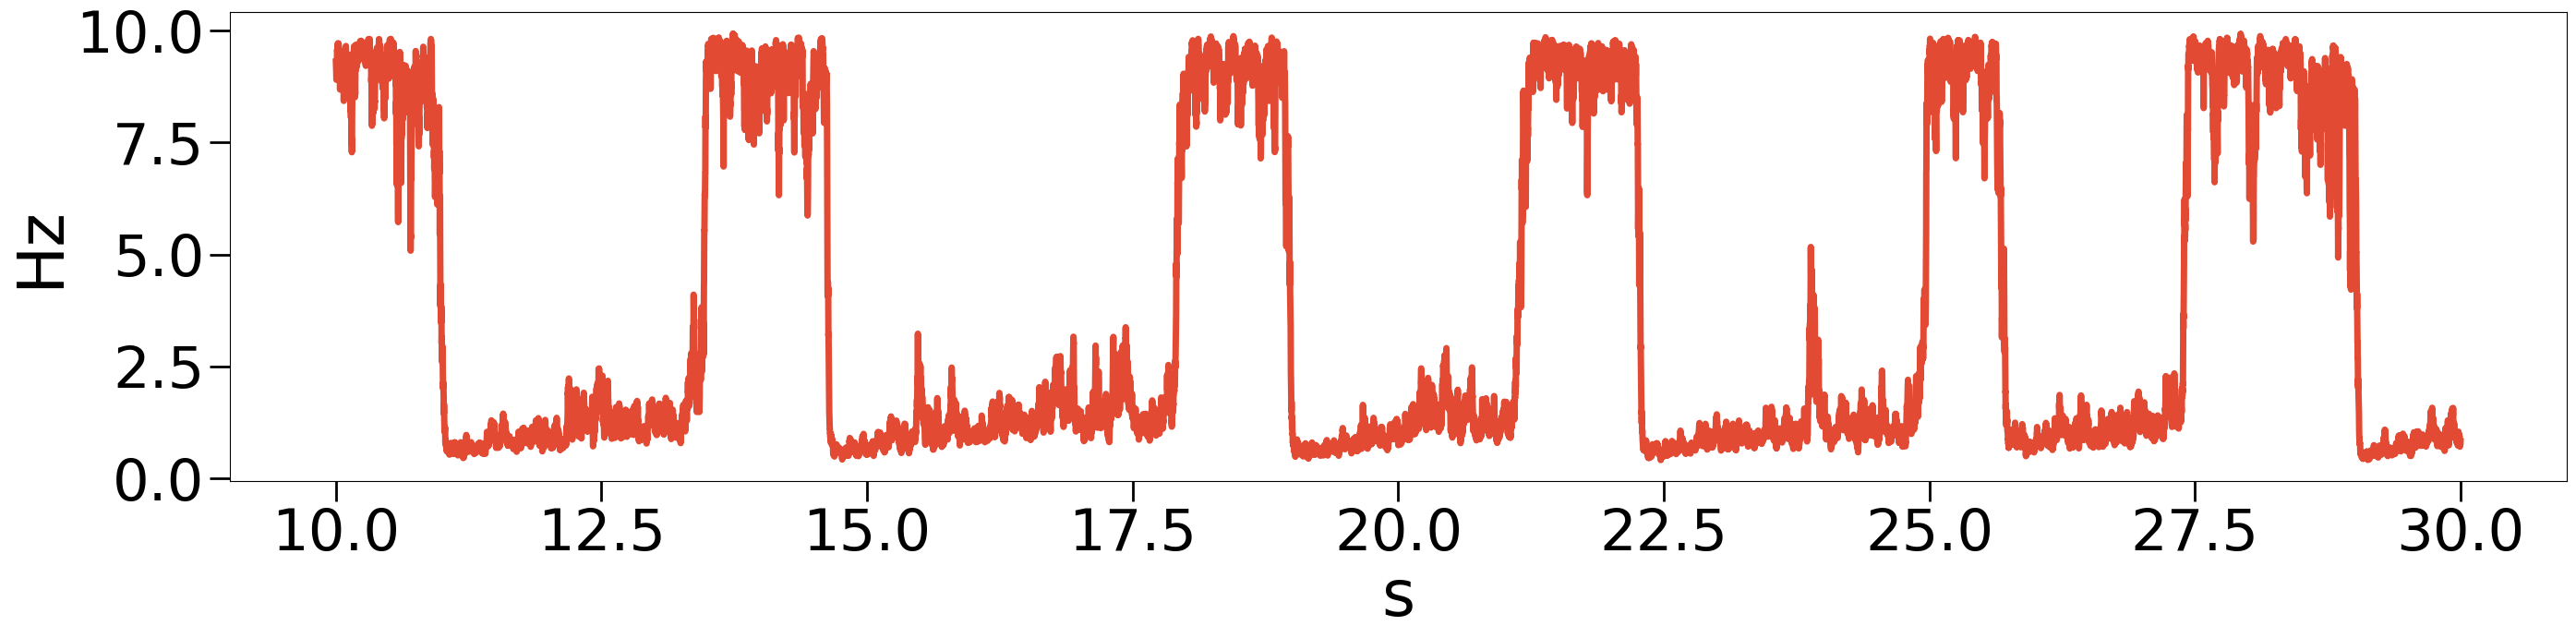

In [15]:
plt_funcs.plot_exc_only_2D(sim_time,rate,start_time = 10,end_time = 30,saveplot = False)

In [62]:
model_2D.N = 300
sim_time,h,a,rate,kramer_sig_gaus = model_2D.run_sim_2D_grid_adapt_noise(40,model_2D.sigmoidal_transfer,model_2D.f_mult_gauss_noise,params_sigmoid,params_weights)

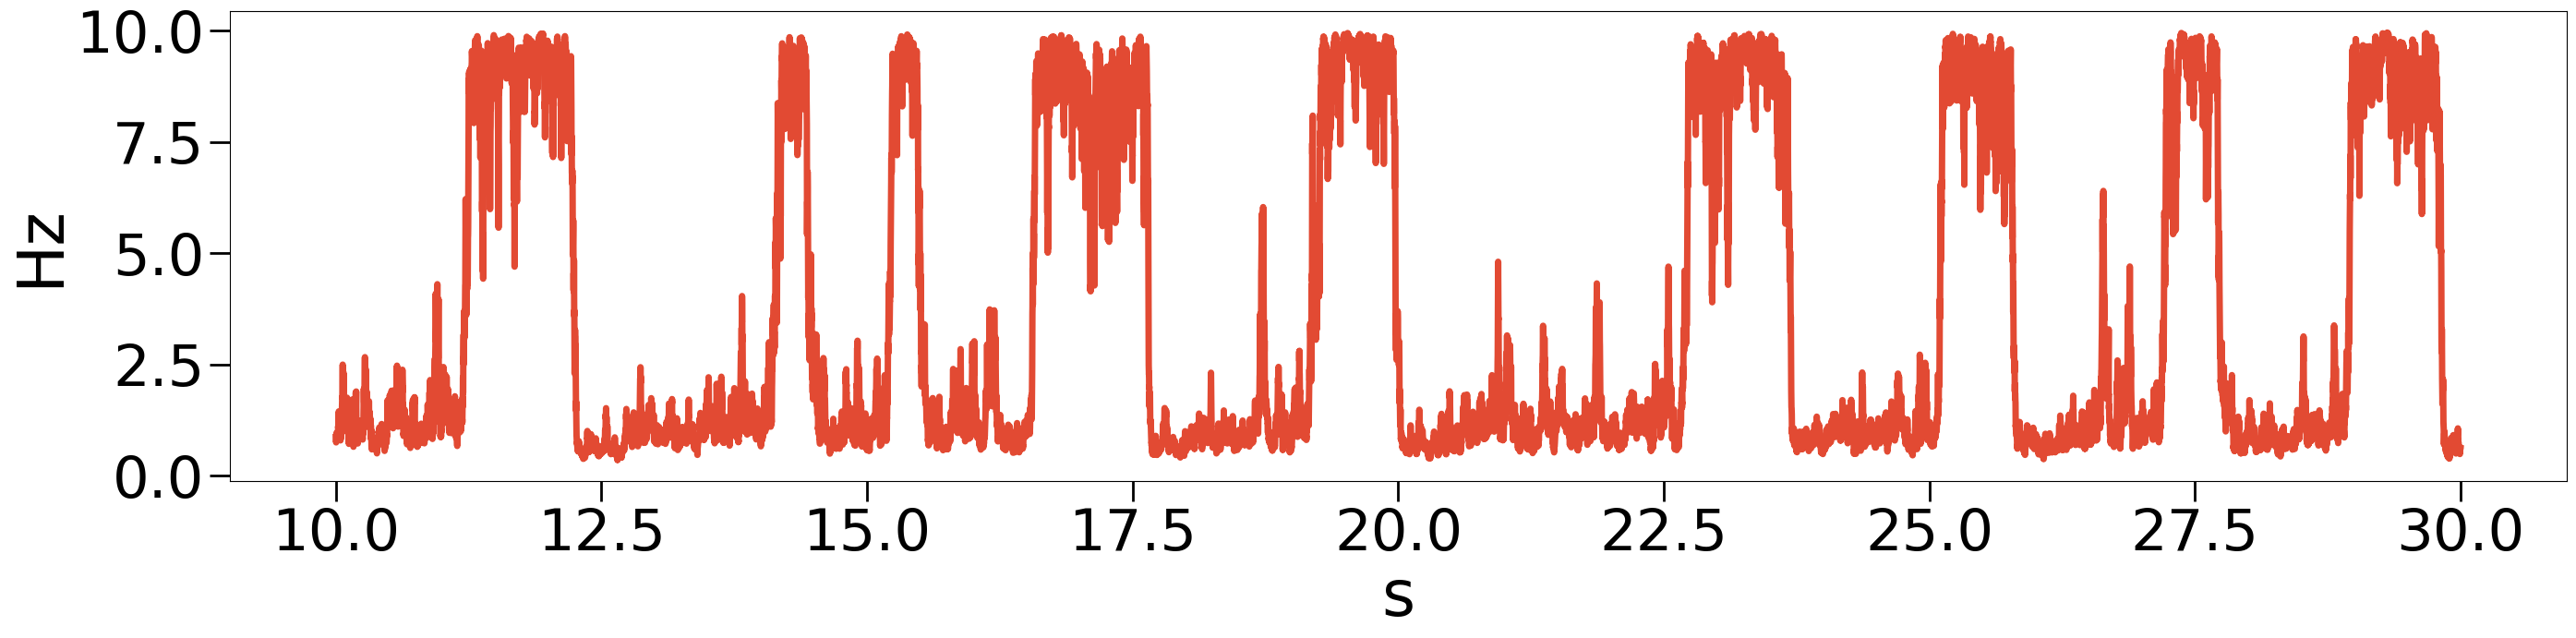

In [64]:
plt_funcs.plot_exc_only_2D(sim_time,rate,start_time = 10,end_time = 30,saveplot = False)

In [46]:
model_2D.N = 600

# Showing traces of simulations with phase diagrams and trajectory

In [16]:
# here all parameters are in mV,s and Hz
w = 1.9
beta = 0.4

I = 2.5
theta = 10

g = 0.25
model_2D.tau_a = 1

params_sigmoid = [g,theta]
params_weights = [beta,w,I]

In [17]:
sim_time,h,a,rate,kramer_sig_gaus = model_2D.run_sim_2D_grid_adapt_noise(40,model_2D.sigmoidal_transfer,model_2D.f_mult_gauss_noise,params_sigmoid,params_weights)

In [18]:
start_traj = 13.24
end_traj = 14.35

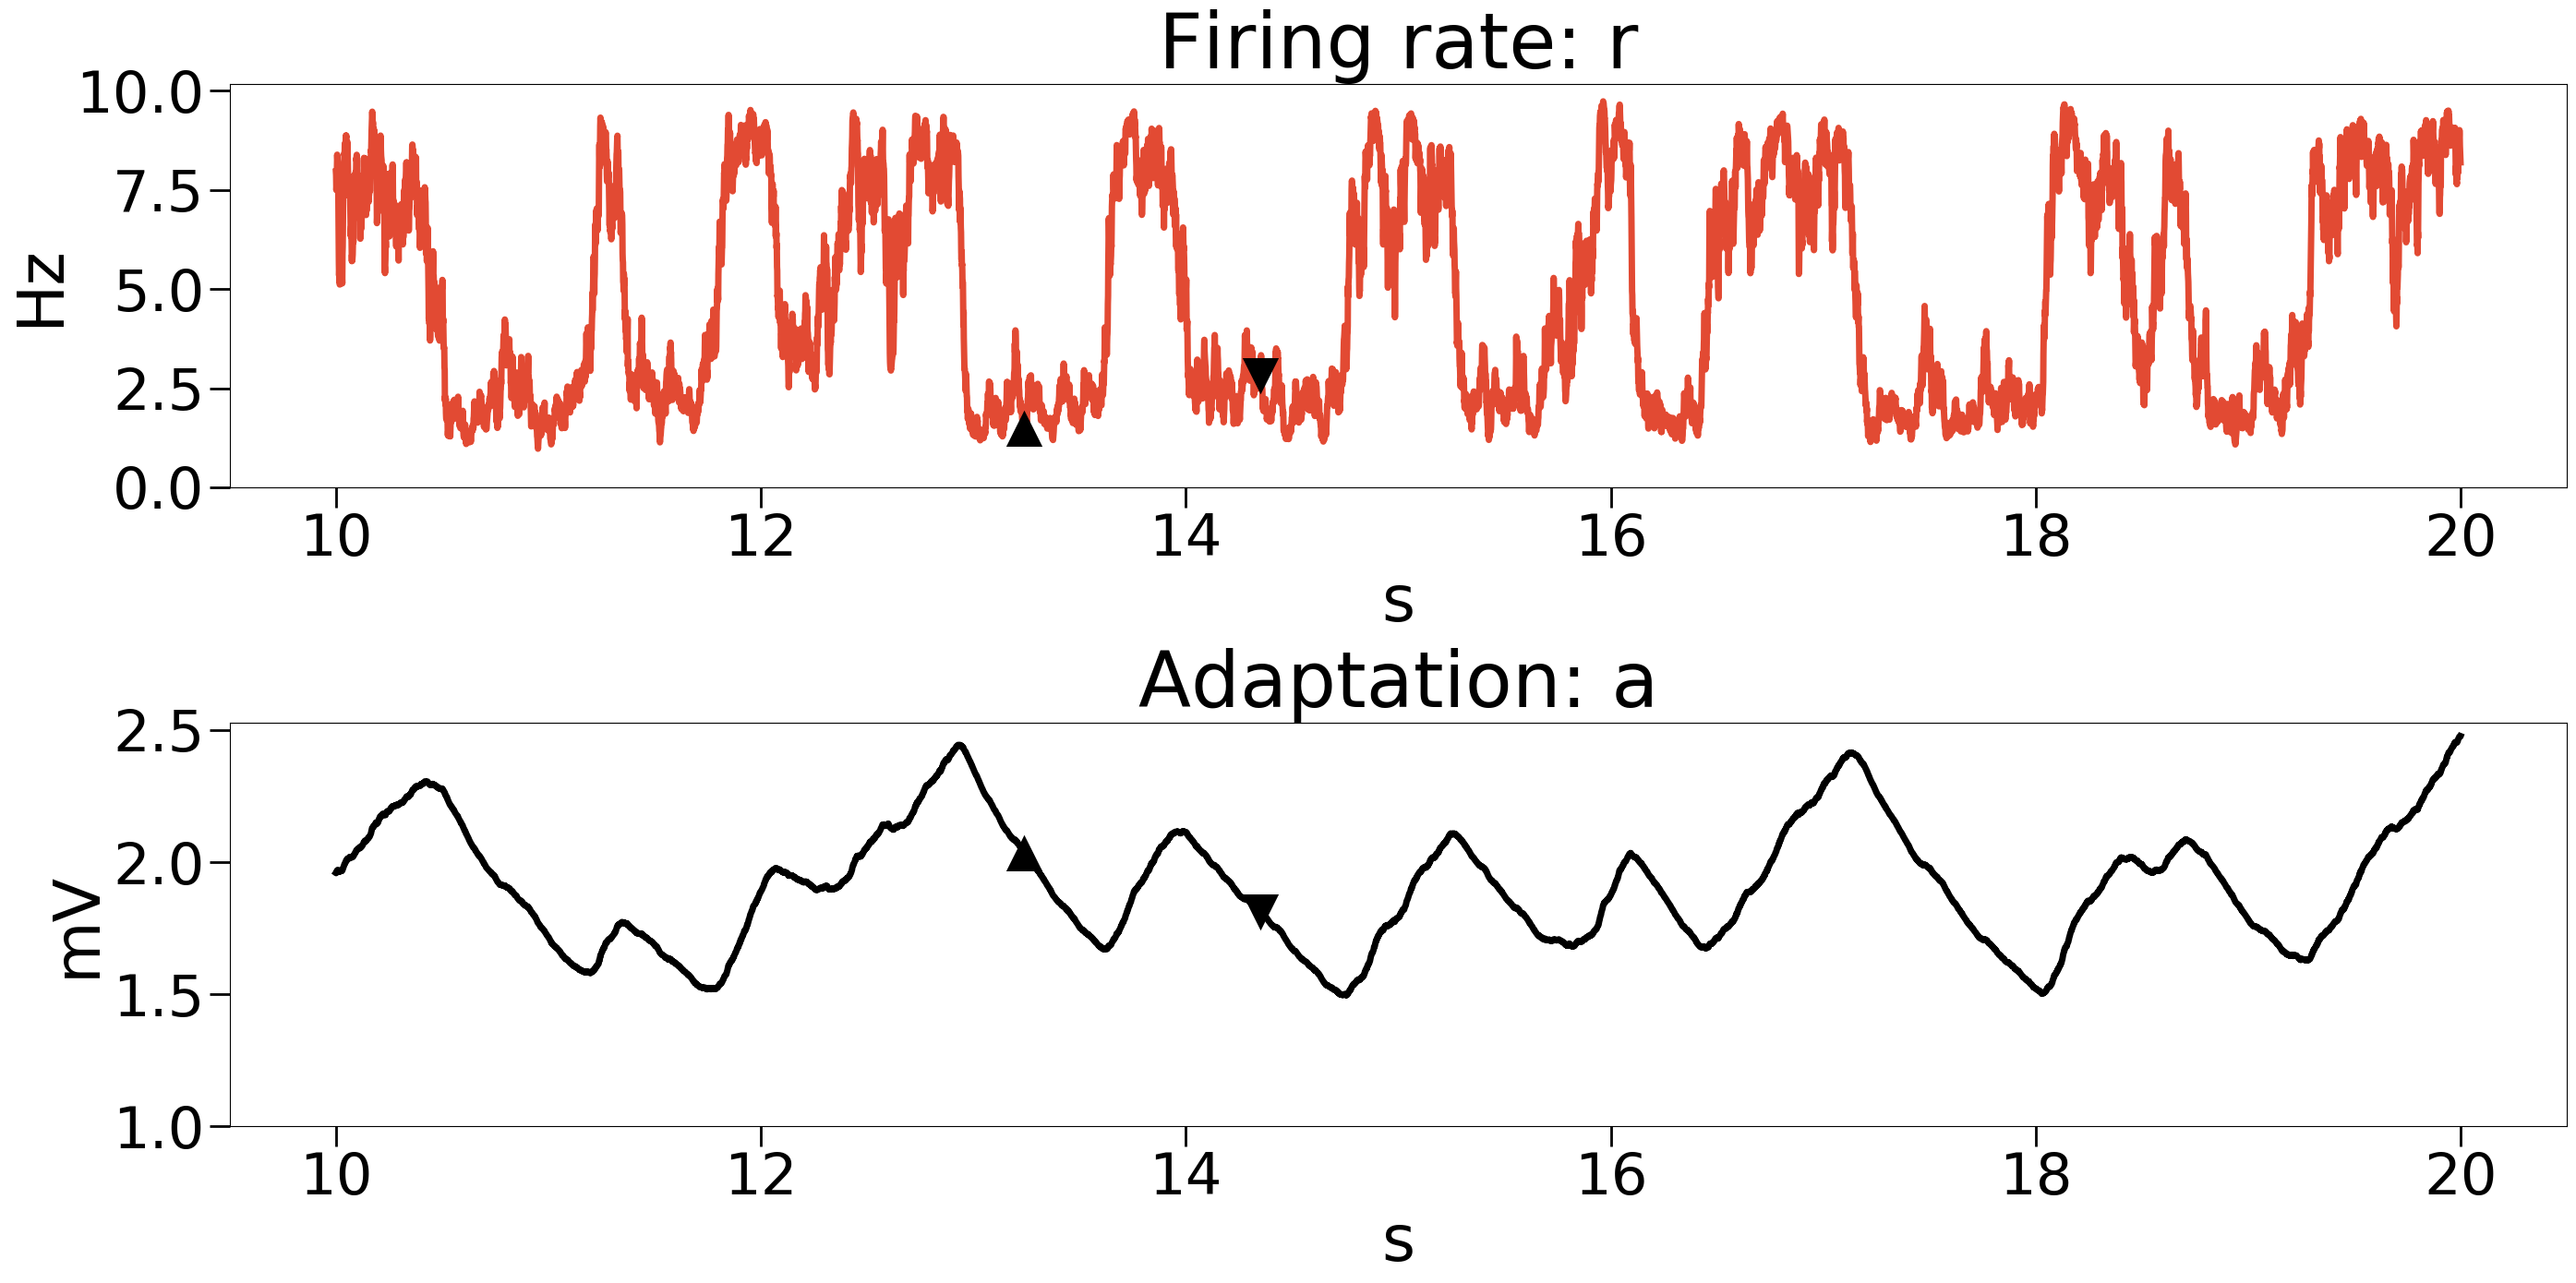

In [14]:
plt_funcs.plot_dynamics_2D_marker(sim_time,rate,a,start_time = 10,end_time = 20,start_traj = start_traj,end_traj = end_traj,saveplot = False)

In [15]:
start_time_traj = int(start_traj/model_2D.dt)
end_time_traj = int(end_traj/model_2D.dt)

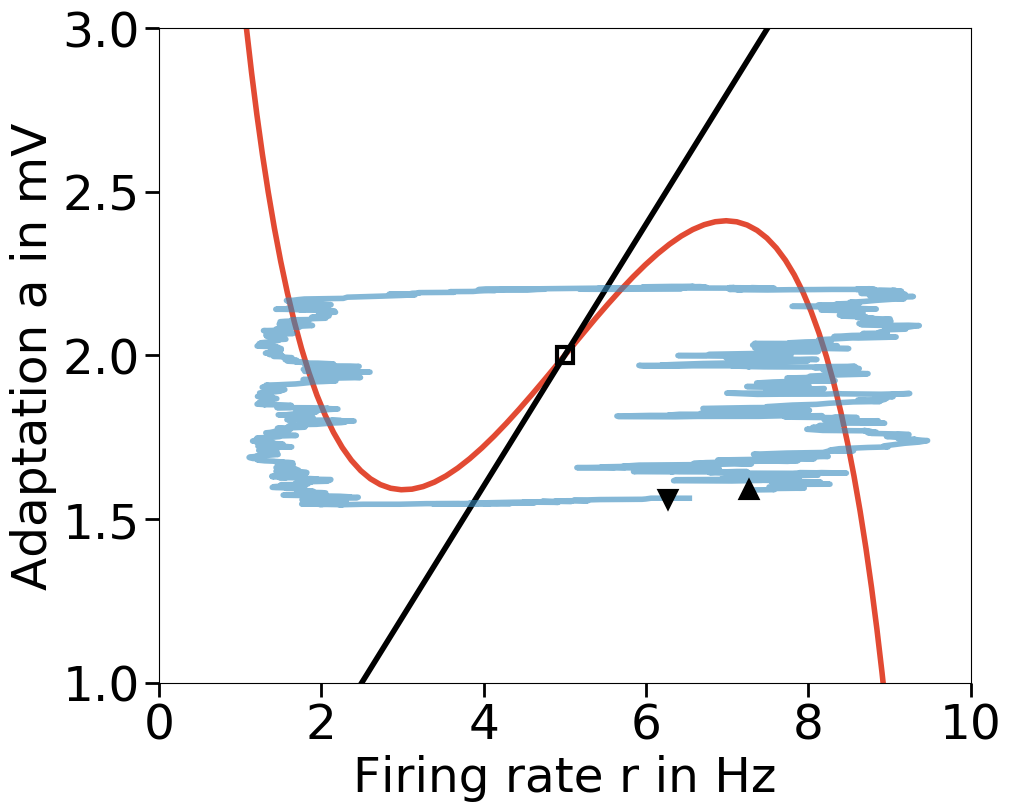

In [399]:
params = {'figure.figsize': (10,8),
          'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 25,
         'axes.labelsize': 35,#25
         'axes.titlesize':35,#25
         'xtick.labelsize':35,#30
         'ytick.labelsize':35,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

params_sigmoid = [g,theta]
params_weights = [beta,w,I]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


plt.plot(F,h_nullcline,label = "r Nullcline")
plt.plot(F,a_nullcline,label = "a Nullcline")
plt.plot(rate[start_time_traj:end_time_traj],a[start_time_traj:end_time_traj],label= "Trajectory",alpha = 0.6)
plt.plot(rate[start_time_traj],a[start_time_traj],marker = "^",mew = 3,ms = 12,color = 'black')
plt.plot(rate[end_time_traj],a[end_time_traj],marker = "v",mew = 3,ms = 12,color = 'black')
#plt.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 3,ms = 14)
#plt.plot(9.05,0.4*9.05,marker = "o",color = "black",fillstyle='full',mew = 3,ms = 12)
plt.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 3,ms = 12)
plt.xlabel("Firing rate r in Hz")
plt.ylabel("Adaptation a in mV")
plt.xlim(0,10)
plt.ylim(1,3)
#plt.legend(loc = "lower center",bbox_to_anchor=(0.5, -0.7))
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()

# Bifurcation Figures

In [20]:
path_matcont = Path('../Data/2D_Model/Matcont_bifurcation/b_04/taua_1000/')

In [21]:
hopf_x = load(Path.joinpath(path_matcont, "hopf_curve_x.npy"))
hopf_y = load(Path.joinpath(path_matcont, "hopf_curve_y.npy"))
cusp_x = load(Path.joinpath(path_matcont, "cusp_curve_x.npy"))
cusp_y = load(Path.joinpath(path_matcont, "cusp_curve_y.npy"))

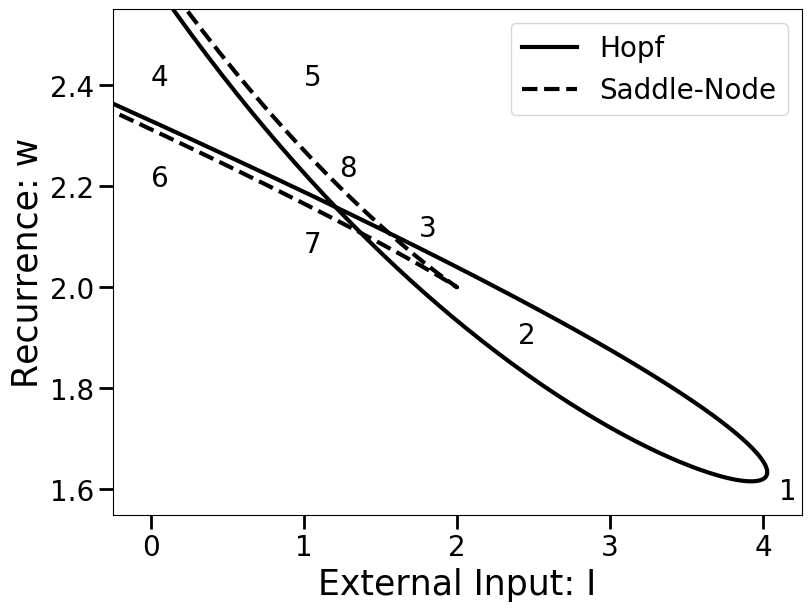

In [22]:
params = {'figure.figsize': (8,6),
          'axes.prop_cycle': colors,
          'lines.linewidth': 3,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

plt.plot(hopf_x,hopf_y,linestyle = "solid",color = "black",label = "Hopf")
plt.plot(cusp_x,cusp_y,linestyle = "--",color = "black",label = "Saddle-Node")
plt.text(4.1, 1.58, r'1', fontsize=20)
plt.text(2.4, 1.89, r'2', fontsize=20)
plt.text(1.75, 2.1, r'3', fontsize=20)
plt.text(0, 2.4, r'4', fontsize=20)
plt.text(1, 2.4, r'5', fontsize=20)
plt.text(0, 2.2, r'6', fontsize=20)
plt.text(1, 2.07, r'7', fontsize=20)
plt.text(1.23, 2.22, r'8', fontsize=20)
#plt.plot(1.1,2.21,marker = "x",mew = 2,ms = 10,label = "8")
#plt.plot(1.1,2.16,marker = "x",mew = 2,ms = 10,label = "7")
#plt.plot(1.5,2.1,marker = "x",mew = 2,ms = 10,label = "3")
#plt.text(-0.2, 2.4, r'Bistable', fontsize=30)
#plt.text(2, 2.1, r'Excitable Up', fontsize=25)
#plt.text(0.5, 1.9, r'Excitable Down', fontsize=30)
plt.xlabel("External Input: I")
plt.ylabel("Recurrence: w")
plt.xlim(-0.25,4.25)
plt.ylim(1.55,2.55)
plt.legend()
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()

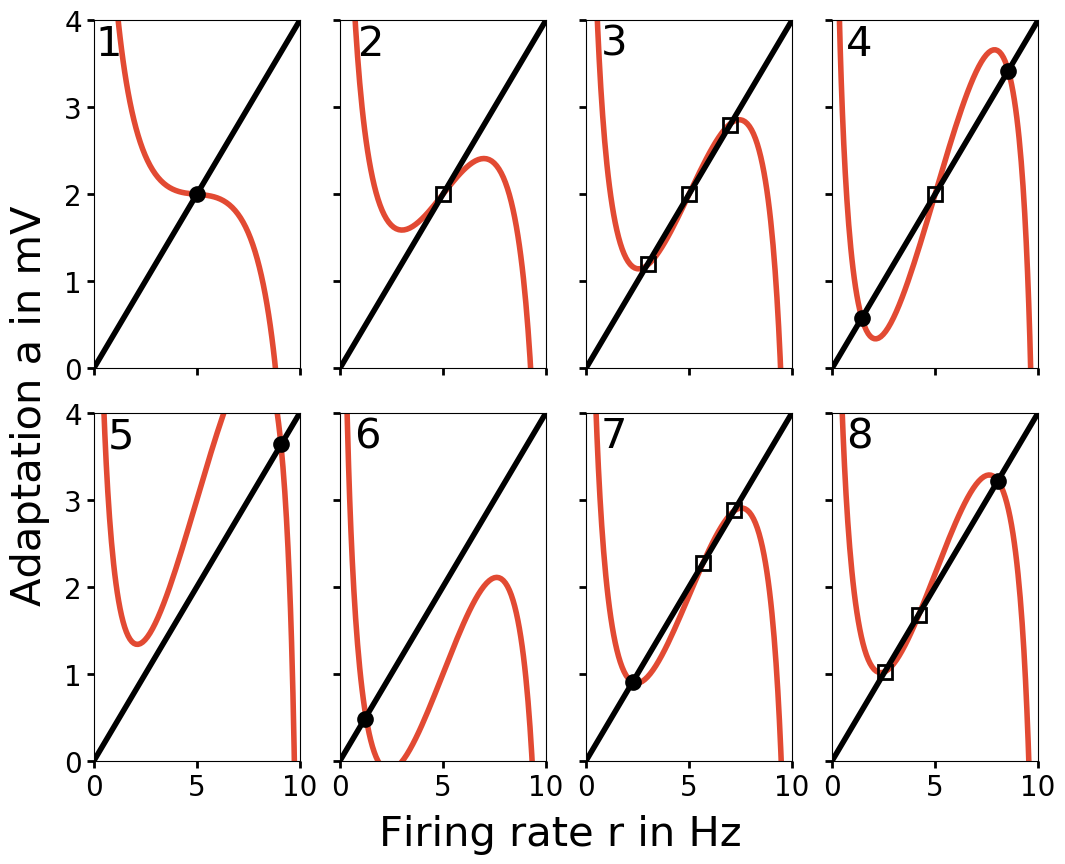

In [28]:
params = {'figure.figsize': (10,8),
          'axes.prop_cycle': colors,
          'lines.linewidth': 4,
          'legend.fontsize': 25,
         'axes.labelsize': 30,
         'axes.titlesize':35,
         'xtick.labelsize':20,
         'ytick.labelsize':20,
            'xtick.major.size': 5,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 5,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)
fig, ((ax1, ax2,ax3, ax4), (ax5, ax6,ax7, ax8)) = plt.subplots(2,4, sharex=True, sharey=True)
# first plot
params_sigmoid = [g,theta]
params_weights = [beta,1.58,4.1]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax1.plot(F,h_nullcline)
ax1.plot(F,a_nullcline)
ax1.plot(5,0.4*5,marker = "o",color = "black",fillstyle='full',mew = 2,ms = 10)
ax1.set_xlim(0,10)
ax1.set_ylim(0,4)
ax1.text(0.1,3.6,"1",fontsize = 30)

# 2 plot
params_sigmoid = [g,theta]
params_weights = [beta,1.9,2.5]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax2.plot(F,h_nullcline)
ax2.plot(F,a_nullcline)
ax2.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax2.set_xlim(0,10)
ax2.set_ylim(0,4)
ax2.text(0.9,3.6,"2",fontsize = 30)

# 3 plot
params_sigmoid = [g,theta]
params_weights = [beta,2.1,1.5]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax3.plot(F,h_nullcline)
ax3.plot(F,a_nullcline)
ax3.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax3.plot(3,0.4*3,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax3.plot(7,0.4*7,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax3.set_xlim(0,10)
ax3.set_ylim(0,4)
ax3.text(0.7,3.6,"3",fontsize = 30)

# 4 plot
params_sigmoid = [g,theta]
params_weights = [beta,2.4,0]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax4.plot(F,h_nullcline)
ax4.plot(F,a_nullcline)
ax4.plot(5,0.4*5,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax4.plot(1.45,0.4*1.45,marker = "o",color = "black",fillstyle='full',mew = 2,ms = 10)
ax4.plot(8.55,0.4*8.55,marker = "o",color = "black",fillstyle='full',mew = 2,ms = 10)
ax4.set_xlim(0,10)
ax4.set_ylim(0,4)
ax4.text(0.7,3.6,"4",fontsize = 30)

# 5 plot
params_sigmoid = [g,theta]
params_weights = [beta,2.4,1]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax5.plot(F,h_nullcline)
ax5.plot(F,a_nullcline)
ax5.plot(9.1,0.4*9.1,marker = "o",color = "black",fillstyle='full',mew = 2,ms = 10)
ax5.set_xlim(0,10)
ax5.set_ylim(0,4)
ax5.text(0.7,3.6,"5",fontsize = 30)

# 6 plot
params_sigmoid = [g,theta]
params_weights = [beta,2.2,0]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax6.plot(F,h_nullcline)
ax6.plot(F,a_nullcline)
ax6.plot(1.2,0.4*1.2,marker = "o",color = "black",fillstyle='full',mew = 2,ms = 10)
ax6.set_xlim(0,10)
ax6.set_ylim(0,4)
ax6.text(0.7,3.6,"6",fontsize = 30)

# 7 plot
params_sigmoid = [g,theta]
params_weights = [beta,2.16,1.1]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax7.plot(F,h_nullcline)
ax7.plot(F,a_nullcline)
ax7.plot(5.7,0.4*5.7,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax7.plot(2.27,0.4*2.27,marker = "o",color = "black",fillstyle='full',mew = 2,ms = 10)
ax7.plot(7.2,0.4*7.2,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax7.set_xlim(0,10)
ax7.set_ylim(0,4)
ax7.text(0.7,3.6,"7",fontsize = 30)

# 8 plot
params_sigmoid = [g,theta]
params_weights = [beta,2.21,1.1]
h = np.linspace(-10,40,200)

h_nullcline = model_2D.exc_nullcline_2D(h,params_sigmoid,params_weights)
a_nullcline = model_2D.adapt_nullcline_2D(h,params_sigmoid,params_weights)
F = model_2D.sigmoidal_transfer(h,g,theta)


ax8.plot(F,h_nullcline)
ax8.plot(F,a_nullcline)
ax8.plot(4.2,0.4*4.2,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax8.plot(2.55,0.4*2.55,marker = "s",color = "black",fillstyle='none',mew = 2,ms = 10)
ax8.plot(8.05,0.4*8.05,marker = "o",color = "black",fillstyle='full',mew = 2,ms = 10)
ax8.set_xlim(0,10)
ax8.set_ylim(0,4)
ax8.text(0.7,3.6,"8",fontsize = 30)


fig.text(0.5, -0.05, "Firing rate r in Hz", ha='center', fontsize=30)
fig.text(-0.05, 0.5, "Adaptation a in mV", va='center', rotation='vertical', fontsize=30)
#plt.legend(loc = "lower center",bbox_to_anchor=(0.5, -0.7))
#plt.savefig(path_save, bbox_inches='tight',dpi=200)


plt.show()

In [23]:
path_matcont_bigbeta = Path('../Data/2D_Model/Matcont_bifurcation/b_06/taua_1000/')

In [24]:
hopf_x_bigbeta = load(Path.joinpath(path_matcont_bigbeta, "hopf_curve_x.npy"))
hopf_y_bigbeta = load(Path.joinpath(path_matcont_bigbeta, "hopf_curve_y.npy"))
cusp_x_bigbeta = load(Path.joinpath(path_matcont_bigbeta, "cusp_curve_x.npy"))
cusp_y_bigbeta = load(Path.joinpath(path_matcont_bigbeta, "cusp_curve_y.npy"))

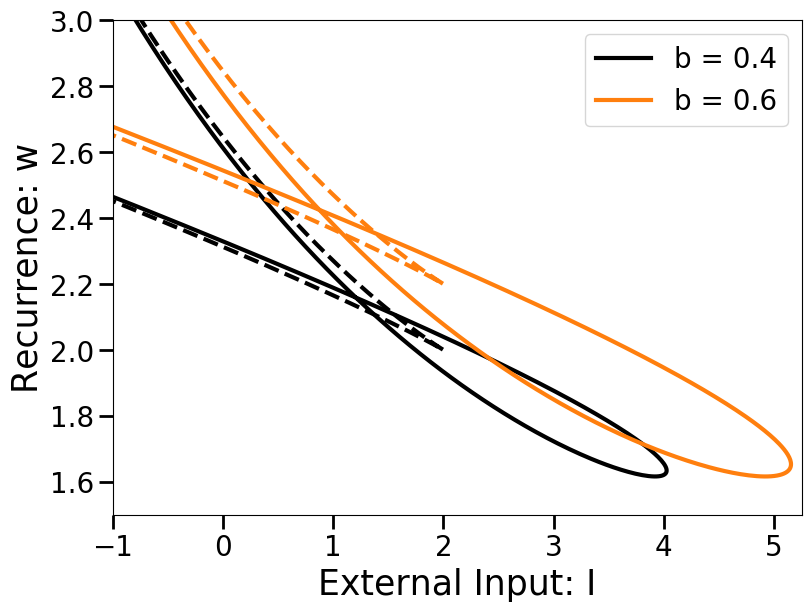

In [25]:
params = {'figure.figsize': (8,6),
          'axes.prop_cycle': colors,
          'lines.linewidth': 3,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)

plt.plot(hopf_x,hopf_y,color = "black",label = "b = 0.4")# hopf bifurkationdbereich wird länger für tau_a größer
plt.plot(cusp_x,cusp_y,color = "black",linestyle = "dashed")# cusp linie ändert sich nicht mit anderem tau_a
plt.plot(hopf_x_bigbeta,hopf_y_bigbeta,color = "tab:orange",label = "b = 0.6")
plt.plot(cusp_x_bigbeta,cusp_y_bigbeta,linestyle = "dashed",color = "tab:orange")
plt.xlim(-1,5.25)
plt.ylim(1.5,3)
plt.xlabel("External Input: I")
plt.ylabel("Recurrence: w")
plt.xticks([-1,0,1,2,3,4,5])
plt.legend()
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()

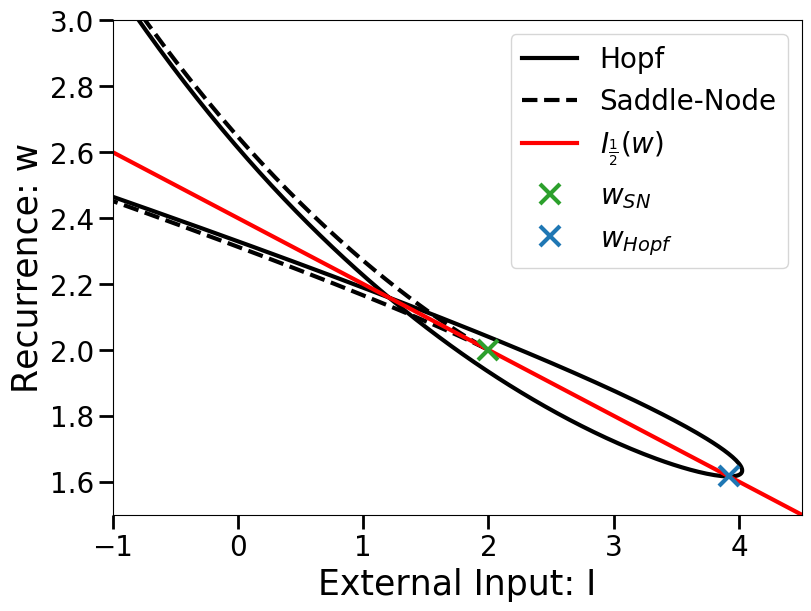

In [26]:
params = {'figure.figsize': (8,6),
          'axes.prop_cycle': colors,
          'lines.linewidth': 3,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
plt.rcParams.update(params)


x = np.array([-1,2,3,4,4.5])

w_hopf = 4/(g*model_2D.r_max)*(model_2D.tau/model_2D.tau_a+1)
I_hopf = 10 - 5*(w_hopf-0.4)

plt.rcParams.update(params)

plt.plot(hopf_x,hopf_y,color = "black",label = "Hopf")# hopf bifurkationdbereich wird länger für tau_a größer
plt.plot(cusp_x,cusp_y,color = "black",linestyle = "dashed",label = "Saddle-Node")# cusp linie ändert sich nicht mit anderem tau_a
plt.plot(x,-0.2*x+2.4,color = "red",linewidth = 3,label = r"$I_{\frac{1}{2}}(w)$")
plt.plot(2,2,marker = "x",mew = 3,ms = 14,color = 'tab:green',label = r"$w_{SN}$",linestyle = 'None')
plt.plot(I_hopf,w_hopf,marker = "x",mew = 3,ms = 14,color = 'tab:blue',label = r"$w_{Hopf}$",linestyle = 'None')

plt.xlim(-1,4.5)
plt.ylim(1.5,3)
plt.xlabel("External Input: I")
plt.ylabel("Recurrence: w")
plt.xticks([-1,0,1,2,3,4])
plt.legend()
#plt.savefig(path_save, bbox_inches='tight',dpi=200)
plt.show()